In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Set display options to show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 80)

In [2]:
df = pd.read_csv("data/english_annotated_full_df.csv")

In [48]:
df.head(1)

,q_sentence,q_sentence_nr,codes,manifesto_id,party,date,language,handbook,title,coderid,countryname,partyname,pervote,q_sentence_chars,q_sentence_words,main_codes,RILE
0,Which party will make a real difference to my child's education?,1,NaN,51421_199705,51421,199705,english,1,Make the Difference,102,United Kingdom,Liberal Democrats,16.758,64,11,-1,0


Question 1: How many manifestos and quasi sentences in total?

In [49]:
print("Total number q_sentences:", df.shape[0])
print("Total number of manifestos:", len(df["manifesto_id"].unique()))


Total number q_sentences: 202187
Total number of manifestos: 209


In [50]:
temp = df.groupby(['countryname']).agg({'manifesto_id': 'nunique', 'date': ['min', 'max']})
temp

manifesto_id    date        
                    nunique     min     max
countryname                                
Australia                37  200111  201905
Canada                   14  200406  201510
Ireland                  23  200705  201602
Israel                    1  200301  200301
New Zealand              53  198407  202010
Poland                    6  199110  199309
Slovakia                  2  199006  199206
South Africa             29  199404  201905
United Kingdom           34  199705  201912
United States            10  199211  202011

In [51]:
# How many documents per party in country:
temp = df.groupby(['countryname', 'partyname'])['manifesto_id'].nunique()

In [52]:
# here you can get the counts for the separat countries
temp["Ireland"]

partyname
Anti-Austerity Alliance            1
Family of the Irish                3
Green Party                        3
Independent Alliance               1
Labour Party                       3
People Before Profit               1
Progressive Democrats              1
Social Democrats                   1
Socialist Party                    1
Soldiers of Destiny                3
United Left Alliance               1
We Ourselves                       3
Workers and Unemployment Action    1
Name: manifesto_id, dtype: int64

In [99]:
# how many coders in total?
print("Total coders:", len(df["coderid"].unique()))
print("Average number of manifestos per coder:", len(df["manifesto_id"].unique())/len(df["coderid"].unique()))

Total coders: 21
Average number of manifestos per coder: 9.952380952380953


Quasi sentences that are way too long (100 words or more): how many? These will be removed
Also: get examples

In [53]:
df_final = df[df["q_sentence_words"] < 100]
df_temp = df[df["q_sentence_words"] >= 100]
df_temp = df_temp.sort_values(by="q_sentence_words", ascending=False)

In [100]:
# Filter rows where strings contain a "." that is not at the end
filtered_df = df[df['q_sentence'].str.contains(r'\.(?!$)')]

In [108]:
# this shows we cant just remove q-sentences that contain a "." in the middle.
pd.set_option('display.max_colwidth', 200)
print(filtered_df["q_sentence"])
pd.set_option('display.max_colwidth', 80)

205                                                                                   We will introduce independent regulation of financial services and improve processes for redress (e./ g./ for mis-selling).
522       A healthier nation and a more cost-effective NHS depend on shifting the emphasis towards prevention, tackling the root causes of ill health (e./ g./ poverty and homelessness) and making people mor...
894                                             We will set out a timetable for sustained progress towards achieving the UN target for overseas development aid of 0./7 per cent of GNP within the next 10 years.
922                                                                                                                                                                                                           1.)
925                                                                                                                                                             

In [56]:
# infos on the longest one as an example:
df_temp.head(1)

,q_sentence,q_sentence_nr,codes,manifesto_id,party,date,language,handbook,title,coderid,countryname,partyname,pervote,q_sentence_chars,q_sentence_words,main_codes,RILE
110900,"Mr Chris Bowen Shadow Treasurer Australian Labor PartyDear Chris,We have...",2527,NaN,63320_201607,63320,201607,english,5,Australian Labor Party 2016. 100 Positive Policies [Copied from website],342,Australia,Australian Labor Party,34.726,7014,1025,-1,0


In [43]:
# shortest one?
df_temp.tail(1)

,q_sentence,q_sentence_nr,codes,manifesto_id,party,date,language,handbook,title,coderid,countryname,partyname,pervote,q_sentence_chars,q_sentence_words,main_codes,RILE
5478,More problems are created by so-called ‘econom...,1029,NaN,51110_201505,51110,201505,english,4,For the common good. General election manifest...,319,United Kingdom,Green Party of England and Wales,3.8,618,100,-1,0


In [44]:
# what codes are given here?
df_temp["main_codes"].value_counts()

main_codes
-1      93
 305     1
 402     1
 503     1
Name: count, dtype: int64

In [62]:
pd.set_option('display.max_colwidth', None)
print(df_temp[df_temp["q_sentence_words"] == 100]["q_sentence"])
pd.set_option('display.max_colwidth', 80)

25994                                                                     We have set out our spending over ten years, in line with our proposed ten- year Green New Deal to put us on track to reducing our carbon emissions to zero by 2030. This extended time period reflects the scale of the change needed to fix our climate and fund our future. For ease of comprehension, we have put investment and spending amounts as per billion per year. Although exact rates of investment and spending may vary year from year (especially as policies are phased in), the average for each year after ten years will be the yearly figure given.
5478     More problems are created by so-called ‘economies of scale’ where, in an attempt to emulate industry, common services have been merged into larger entities regardless of the nature of the variety of demand. Individual and local knowledge are lost and problems are dealt with according to protocols and pathways, not what is best for the patient. This has to chang

In [104]:
pd.set_option('display.max_colwidth', None)
print(df_temp[df_temp["q_sentence_words"] == 1025]["q_sentence"])
pd.set_option('display.max_colwidth', 80)

110900    Mr  Chris  Bowen Shadow Treasurer Australian  Labor  PartyDear Chris,We have been engaged  by you  to examine  and assess the  Australian Labor Party’s federal election policy costings.The scope of our work was purely confined to an examination of the  costings and the  process by which they have been  prepared  by the Parliamentary Budget Office.All of  the  policy  costings in  Labor’s  Budget  Plan  have  been  submitted  to  the  panel and  have  been  fully assessed and reviewed.In assessing Labor’s  election policy costings, we have had  access to  all costings undertaken  by the Parliamentary Budget Office and  have assessed  all the calculation  methods used  to  cost Labor’s election  policy  commitments.We note that more than  half of the costings have capped  funding and  therefore present a high  degree of certainty. Where assumptions have been  made around  potential behavioural responses, we have relied  upon  the assessments of the Parliamentary Budget Office.T

In [38]:
print("Number of q_sentences with at least 100 words:", df_temp.shape[0])
print("Length of the longest q_sentence:", max(df_temp["q_sentence_words"]), "words")


Number of q_sentences with at least 100 words: 96
Length of the longest q_sentence: 1025 words


In [39]:
max(df_temp["q_sentence_words"])

1025

Getting final sizes etc:

In [126]:
df_final.shape

(202091, 17)

In [131]:
# how many green and RILE?
print("Percentage of green quasi sentences:", df_final[df_final["main_codes"] == 501].shape[0]/df_final.shape[0])
print("Percentage of left quasi sentences:", df_final[df_final["RILE"] == 1].shape[0]/df_final.shape[0])
print("Percentage of right quasi sentences:", df_final[df_final["RILE"] == 2].shape[0]/df_final.shape[0])
print("Percentage of neutral quasi sentences:", df_final[df_final["RILE"] == 0].shape[0]/df_final.shape[0])

Percentage of green quasi sentences: 0.05193699867881301
Percentage of left quasi sentences: 0.27075426416812226
Percentage of right quasi sentences: 0.2011222667016344
Percentage of neutral quasi sentences: 0.5281234691302433


In [130]:
df_final["RILE"].value_counts()

RILE
0    106729
1     54717
2     40645
Name: count, dtype: int64

From now on, df_final is used, with q_sentences under 100 words

What are the top and bottom frequency codes:

In [63]:
df_final.head(1)

,q_sentence,q_sentence_nr,codes,manifesto_id,party,date,language,handbook,title,coderid,countryname,partyname,pervote,q_sentence_chars,q_sentence_words,main_codes,RILE
0,Which party will make a real difference to my child's education?,1,NaN,51421_199705,51421,199705,english,1,Make the Difference,102,United Kingdom,Liberal Democrats,16.758,64,11,-1,0


In [74]:
code_distribution = df_final["main_codes"].value_counts()/df_final.shape[0]
code_distribution
# create top 5 bottom 5 table from this

main_codes
 504    0.099327
-1      0.069553
 411    0.067202
 0      0.059424
 501    0.051937
 503    0.050834
 506    0.048617
 605    0.041877
 703    0.031303
 403    0.029734
 701    0.029076
 410    0.027171
 402    0.026048
 303    0.025004
 305    0.024692
 202    0.020387
 416    0.019288
 301    0.019179
 607    0.018096
 107    0.017586
 601    0.017032
 104    0.016641
 706    0.016334
 201    0.015889
 502    0.015127
 401    0.014320
 414    0.012549
 603    0.009511
 705    0.008981
 606    0.008620
 304    0.007294
 505    0.006141
 407    0.005849
 408    0.005770
 108    0.005507
 413    0.005463
 406    0.005235
 602    0.005136
 412    0.004795
 101    0.004221
 404    0.003677
 105    0.003444
 110    0.002974
 106    0.002850
 204    0.002380
 604    0.002039
 702    0.002019
 203    0.001955
 109    0.001940
 704    0.001707
 405    0.001470
 409    0.001410
 302    0.001361
 507    0.001079
 608    0.000955
 415    0.000896
 103    0.000564
 102    0.000534
Nam

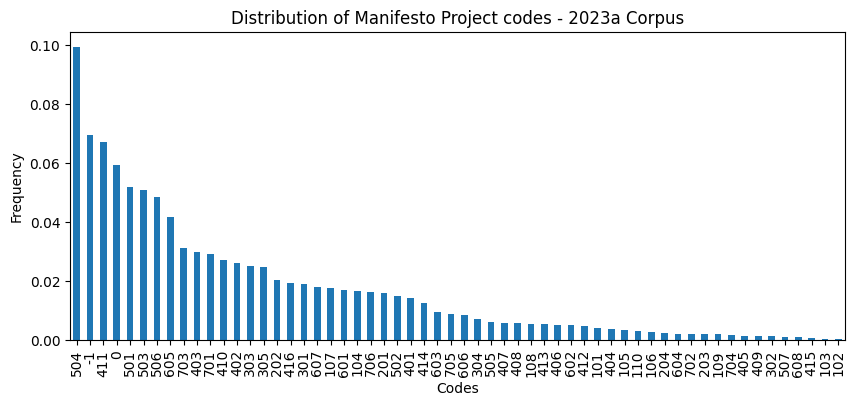

In [112]:
# Create a bar plot
plt.figure(figsize=(10, 4))
code_distribution.plot(kind='bar')

# Add labels and title
plt.xlabel('Codes')
plt.ylabel('Frequency')
plt.title('Distribution of Manifesto Project codes - 2023a Corpus')

# Show the plot
plt.show()

In [110]:
# variance of the codes: (is this really helpful?)
# Calculate proportions of each main_code within each manifesto_id
proportions = df_final.groupby(['manifesto_id', 'main_codes']).size() / df_final.groupby('manifesto_id').size()

# Calculate the variance of these proportions across manifesto_ids for each main_code
variance_per_main_code = proportions.groupby('main_codes').var()

variance_per_main_code

main_codes
-1      0.005477
 0      0.002946
 101    0.000126
 102    0.000018
 103    0.000016
 104    0.000353
 105    0.000061
 106    0.000018
 107    0.000268
 108    0.000753
 109    0.000044
 110    0.000639
 201    0.000492
 202    0.001025
 203    0.000100
 204    0.000222
 301    0.000783
 302    0.000036
 303    0.001170
 304    0.001168
 305    0.003212
 401    0.000890
 402    0.000560
 403    0.000561
 404    0.000068
 405    0.000013
 406    0.000174
 407    0.000170
 408    0.000313
 409    0.000318
 410    0.000638
 411    0.001664
 412    0.000130
 413    0.000513
 414    0.001099
 415    0.012627
 416    0.000538
 501    0.002471
 502    0.000188
 503    0.001902
 504    0.002570
 505    0.000482
 506    0.001258
 507    0.000021
 601    0.000754
 602    0.001373
 603    0.000838
 604    0.000083
 605    0.001575
 606    0.000316
 607    0.002669
 608    0.000069
 701    0.000474
 702    0.000216
 703    0.001328
 704    0.000050
 705    0.000266
 706    0.000363
dty

Is the criticism true, that longer documents have longer quasi sentences?

In [78]:
df_final.head(1)

,q_sentence,q_sentence_nr,codes,manifesto_id,party,date,language,handbook,title,coderid,countryname,partyname,pervote,q_sentence_chars,q_sentence_words,main_codes,RILE
0,Which party will make a real difference to my child's education?,1,NaN,51421_199705,51421,199705,english,1,Make the Difference,102,United Kingdom,Liberal Democrats,16.758,64,11,-1,0


In [82]:
temp = df.groupby(['manifesto_id']).agg({'q_sentence_words': ['sum', 'mean']})

In [87]:
pd.set_option('display.max_rows', 10)
print(temp["q_sentence_words"])
pd.set_option('display.max_rows', None)

                 sum       mean
manifesto_id                   
181210_201405  11816  20.232877
181210_201905  24145  17.087757
181310_199404   3403  14.179167
181310_199906   6615  15.528169
181310_200404   1687  16.221154
...              ...        ...
92710_199110    1786  15.946429
92710_199309     634  14.409091
92811_199309    1217  13.522222
96220_199206    3215  21.577181
96952_199006    1005  13.581081

[209 rows x 2 columns]


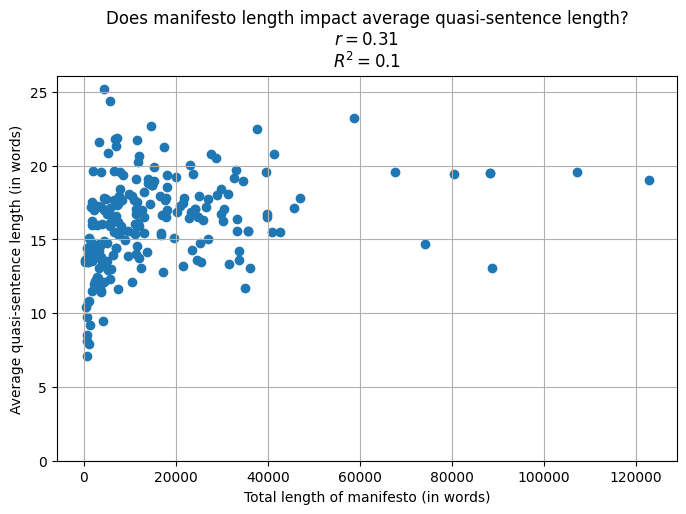

In [125]:
# Scatter plot
plt.figure(figsize=(8, 5))  # Adjust the figure size as needed
plt.scatter(temp[('q_sentence_words', 'sum')], temp[('q_sentence_words', 'mean')])

# Add labels and title
plt.xlabel('Total length of manifesto (in words)')
plt.ylabel('Average quasi-sentence length (in words)')
plt.title('Does manifesto length impact average quasi-sentence length?\n$r = 0.31$\n$R^2 = 0.1$')
plt.ylim(0, None)

# Show the plot
plt.grid(True)
plt.show()

In [97]:
corr_coef = temp[('q_sentence_words', 'sum')].corr(temp[('q_sentence_words', 'mean')])
print("r = ", corr_coef)
print("r^2 = ", corr_coef*corr_coef)

r =  0.31031687970274396
r^2 =  0.09629656582844727


In [93]:
# exclude very large outlier:
filtered_temp = temp[temp[('q_sentence_words', 'sum')] <= 50000]
filtered_temp[('q_sentence_words', 'sum')].corr(filtered_temp[('q_sentence_words', 'mean')])

0.31568369077161784

In [95]:
# Exclude outliers on both sides
# Determine the cutoff points for the top and bottom 5%
top_cutoff = temp[('q_sentence_words', 'sum')].quantile(0.95)
bottom_cutoff = temp[('q_sentence_words', 'sum')].quantile(0.05)

# Filter out rows based on the cutoff points
filtered_temp = temp[(temp[('q_sentence_words', 'sum')] >= bottom_cutoff) & 
                     (temp[('q_sentence_words', 'sum')] <= top_cutoff)]

# Calculate correlation coefficient
correlation_coefficient = filtered_temp[('q_sentence_words', 'sum')].corr(filtered_temp[('q_sentence_words', 'mean')])
correlation_coefficient

0.2520916211442155

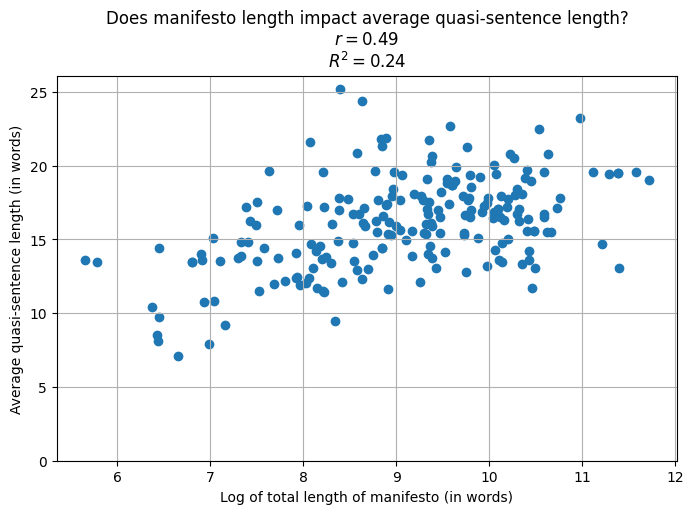

In [124]:
# What about a logarithmic relationship?
# Scatter plot with logarithmic transformation
plt.figure(figsize=(8, 5))  # Adjust the figure size as needed
plt.scatter(np.log(temp[('q_sentence_words', 'sum')]), (temp[('q_sentence_words', 'mean')]))

# Add labels and title
plt.xlabel('Log of total length of manifesto (in words)')
plt.ylabel('Average quasi-sentence length (in words)')
plt.title('Does manifesto length impact average quasi-sentence length?\n$r = 0.49$\n$R^2 = 0.24$')
plt.ylim(0, None)

# Show the plot
plt.grid(True)
plt.show()

In [117]:
corr_coef_log = np.log(temp[('q_sentence_words', 'sum')]).corr(temp[('q_sentence_words', 'mean')])
print("r = ", corr_coef_log)
print("r^2 = ", corr_coef_log*corr_coef_log)

r =  0.48708145665243097
r^2 =  0.23724834541465398
